In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np
import dash
from dash import dcc
import dash_html_components as html
import plotly.express as px

C:\Users\pc\AppData\Local\Temp\ipykernel_21912\944316819.py:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
#import the data

data = pd.read_csv('Jobs.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S/N                      45 non-null     float64
 1   DESCRIPTION OF SERVICE   46 non-null     object 
 2   Client Source            46 non-null     object 
 3   Social Media Handle      9 non-null      object 
 4   Particular               35 non-null     object 
 5   Type of Service          46 non-null     object 
 6   Date (M/D/Y)             46 non-null     object 
 7   Amount to be paid (NGN)  46 non-null     object 
 8   Amount Paid (NGN)        46 non-null     object 
 9   Amount Remaining         0 non-null      float64
 10  Amount to be Save        46 non-null     object 
 11  Status                   46 non-null     object 
 12  Details                  30 non-null     object 
dtypes: float64(2), object(11)
memory usage: 4.8+ KB


In [3]:
#drop Amount and Social Media Handle remaining column

data.drop('Amount Remaining', axis =1, inplace = True)
data.drop ('Social Media Handle', axis =1, inplace = True)

data.head()



,S/N,DESCRIPTION OF SERVICE,Client Source,Particular,Type of Service,Date (M/D/Y),Amount to be paid (NGN),Amount Paid (NGN),Amount to be Save,Status,Details
0,1.0,Birthday Shoot,Old Customer,Dammy Obag,Home Service,1/11/2023,"12,000.00","12,000.00","6,000.00",Job Completed (Paid),NaN
1,2.0,Birthday Shoot,Old Customer,CUST Laderin,Home Service,1/14/2023,"10,000.00","10,000.00","5,000.00",Job Completed (Paid),NaN
2,3.0,Wedding Makeup,Instagram,Jan 21st bride,Home Service,1/21/2023,"135,000.00","135,000.00","67,500.00",Job Completed (Paid),"3 days job.pre wedding shoot in ikeja, engagem..."
3,NaN,Party Makeup,Instagram,Bridesmaid,Party Venue,1/21/2023,"22,000.00","22,000.00","11,000.00",Job Completed (Paid),NaN
4,4.0,Party Makeup,Walk-in,NaN,Studio Session,1/27/2023,"2,000.00","2,000.00","1,000.00",Job Completed (Paid),Makeup only no lashes


In [4]:
#drop S/N column
data.drop('S/N', axis =1, inplace =True) 
data.head()

,DESCRIPTION OF SERVICE,Client Source,Particular,Type of Service,Date (M/D/Y),Amount to be paid (NGN),Amount Paid (NGN),Amount to be Save,Status,Details
0,Birthday Shoot,Old Customer,Dammy Obag,Home Service,1/11/2023,"12,000.00","12,000.00","6,000.00",Job Completed (Paid),NaN
1,Birthday Shoot,Old Customer,CUST Laderin,Home Service,1/14/2023,"10,000.00","10,000.00","5,000.00",Job Completed (Paid),NaN
2,Wedding Makeup,Instagram,Jan 21st bride,Home Service,1/21/2023,"135,000.00","135,000.00","67,500.00",Job Completed (Paid),"3 days job.pre wedding shoot in ikeja, engagem..."
3,Party Makeup,Instagram,Bridesmaid,Party Venue,1/21/2023,"22,000.00","22,000.00","11,000.00",Job Completed (Paid),NaN
4,Party Makeup,Walk-in,NaN,Studio Session,1/27/2023,"2,000.00","2,000.00","1,000.00",Job Completed (Paid),Makeup only no lashes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   DESCRIPTION OF SERVICE   46 non-null     object
 1   Client Source            46 non-null     object
 2   Particular               35 non-null     object
 3   Type of Service          46 non-null     object
 4   Date (M/D/Y)             46 non-null     object
 5   Amount to be paid (NGN)  46 non-null     object
 6   Amount Paid (NGN)        46 non-null     object
 7   Amount to be Save        46 non-null     object
 8   Status                   46 non-null     object
 9   Details                  30 non-null     object
dtypes: object(10)
memory usage: 3.7+ KB


In [6]:

# Convert the 'Amount Paid (NGN)' column from object to integer data type

data['Amount Paid (NGN)'] = data['Amount Paid (NGN)'].str.replace(',', '').astype(float)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DESCRIPTION OF SERVICE   46 non-null     object 
 1   Client Source            46 non-null     object 
 2   Particular               35 non-null     object 
 3   Type of Service          46 non-null     object 
 4   Date (M/D/Y)             46 non-null     object 
 5   Amount to be paid (NGN)  46 non-null     object 
 6   Amount Paid (NGN)        46 non-null     float64
 7   Amount to be Save        46 non-null     object 
 8   Status                   46 non-null     object 
 9   Details                  30 non-null     object 
dtypes: float64(1), object(9)
memory usage: 3.7+ KB


In [7]:
#convert Date from object to date format

data['Date (M/D/Y)'] = pd.to_datetime(data['Date (M/D/Y)'])


In [8]:
#Create a Month column

# create new column with month in text format
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
              7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
data['month'] = data['Date (M/D/Y)'].dt.month.map(month_dict)

In [9]:
data.head()

,DESCRIPTION OF SERVICE,Client Source,Particular,Type of Service,Date (M/D/Y),Amount to be paid (NGN),Amount Paid (NGN),Amount to be Save,Status,Details,month
0,Birthday Shoot,Old Customer,Dammy Obag,Home Service,2023-01-11,"12,000.00",12000.0,"6,000.00",Job Completed (Paid),NaN,January
1,Birthday Shoot,Old Customer,CUST Laderin,Home Service,2023-01-14,"10,000.00",10000.0,"5,000.00",Job Completed (Paid),NaN,January
2,Wedding Makeup,Instagram,Jan 21st bride,Home Service,2023-01-21,"135,000.00",135000.0,"67,500.00",Job Completed (Paid),"3 days job.pre wedding shoot in ikeja, engagem...",January
3,Party Makeup,Instagram,Bridesmaid,Party Venue,2023-01-21,"22,000.00",22000.0,"11,000.00",Job Completed (Paid),NaN,January
4,Party Makeup,Walk-in,NaN,Studio Session,2023-01-27,"2,000.00",2000.0,"1,000.00",Job Completed (Paid),Makeup only no lashes,January


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DESCRIPTION OF SERVICE   46 non-null     object        
 1   Client Source            46 non-null     object        
 2   Particular               35 non-null     object        
 3   Client Phone Number      21 non-null     object        
 4   Type of Service          46 non-null     object        
 5   Date (M/D/Y)             46 non-null     datetime64[ns]
 6   Amount to be paid (NGN)  46 non-null     object        
 7   Amount Paid (NGN)        46 non-null     float64       
 8   Amount to be Save        46 non-null     object        
 9   Status                   46 non-null     object        
 10  Details                  30 non-null     object        
 11  month                    46 non-null     object        
dtypes: datetime64[ns](1), float64(1), obje

#### Analyze the popular service to determine which service is common are most popular among clients.
This information can help you tailor your marketing efforts and service offerings to better meet the needs and preferences of your target audience.

In [10]:
# Group the DataFrame by the "Type of Service" column and count the number of occurrences
service_counts = data.groupby('Type of Service').size().reset_index(name='Count')

# Sort the services by the count of occurrences
sorted_services = service_counts.sort_values('Count', ascending=False)

# Print the most common service
most_common_service = sorted_services.iloc[0]['Type of Service']
print('The most common service is:', most_common_service)

The most common service is: Studio Session


In [11]:
service_counts

,Type of Service,Count
0,Home Service,13
1,Party Venue,3
2,Studio Session,30


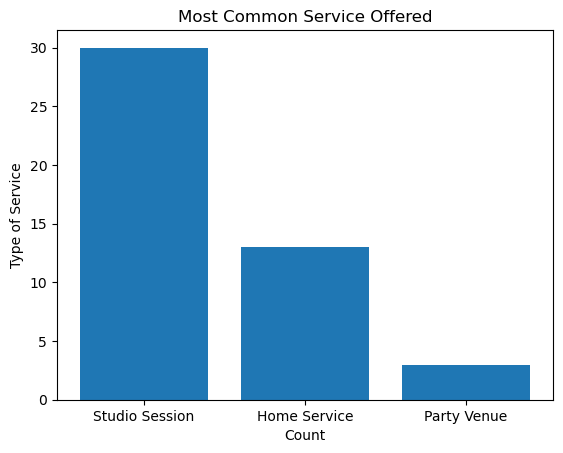

In [12]:

# Group the DataFrame by the "Type of Service" column and count the number of occurrences
service_counts = data.groupby('Type of Service').size().reset_index(name='Count')

# Sort the services by the count of occurrences
sorted_services = service_counts.sort_values('Count', ascending=False)

# Create a horizontal bar chart
plt.bar(sorted_services['Type of Service'], sorted_services['Count'])

# Set the chart title and labels
plt.title('Most Common Service Offered')
plt.xlabel('Count')
plt.ylabel('Type of Service')

# Show the chart
plt.show()


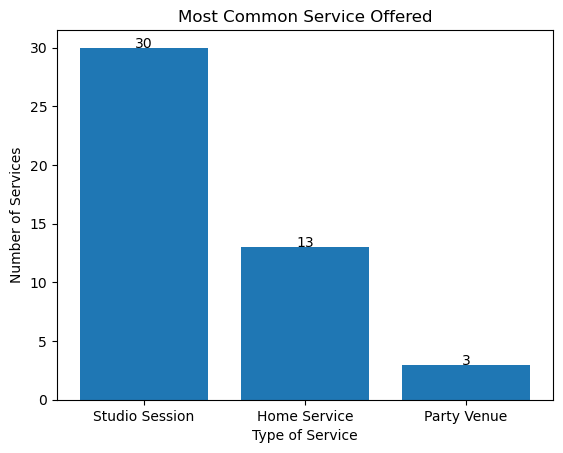

In [13]:
# Group the DataFrame by the "Type of Service" column and count the number of occurrences
service_counts = data.groupby('Type of Service').size().reset_index(name='Count')

# Sort the services by the count of occurrences
sorted_services = service_counts.sort_values('Count', ascending=False)

# Create a horizontal bar chart
plt.bar(sorted_services['Type of Service'], sorted_services['Count'])

# Add the total count label to each bar
for i, v in enumerate(sorted_services['Count']):
    plt.text(i, v, str(v), ha='center')

# Set the chart title and labels
plt.title('Most Common Service Offered')
plt.xlabel('Type of Service')
plt.ylabel('Number of Services')

# Show the chart
plt.show()


In [20]:
data.head()

,DESCRIPTION OF SERVICE,Client Source,Particular,Client Phone Number,Type of Service,Date (M/D/Y),Amount to be paid (NGN),Amount Paid (NGN),Amount to be Save,Status,Details,month
0,Birthday Shoot,Old Customer,Dammy Obag,0916 036 2481,Home Service,2023-01-11,"12,000.00",12000.0,"6,000.00",Job Completed (Paid),NaN,January
1,Birthday Shoot,Old Customer,CUST Laderin,0816 203 4475,Home Service,2023-01-14,"10,000.00",10000.0,"5,000.00",Job Completed (Paid),NaN,January
2,Wedding Makeup,Instagram,Jan 21st bride,0810 671 5085,Home Service,2023-01-21,"135,000.00",135000.0,"67,500.00",Job Completed (Paid),"3 days job.pre wedding shoot in ikeja, engagem...",January
3,Party Makeup,Instagram,Bridesmaid,NaN,Party Venue,2023-01-21,"22,000.00",22000.0,"11,000.00",Job Completed (Paid),NaN,January
4,Party Makeup,Walk-in,NaN,NaN,Studio Session,2023-01-27,"2,000.00",2000.0,"1,000.00",Job Completed (Paid),Makeup only no lashes,January


In [14]:
# Group the dataframe by 'Type of Service' and sum the 'Amount Paid (NGN)' column
total_paid_by_service = data.groupby('Type of Service')['Amount Paid (NGN)'].sum()

# Print the result
print(total_paid_by_service)

Type of Service
Home Service      340000.0
Party Venue        28700.0
Studio Session    195300.0
Name: Amount Paid (NGN), dtype: float64


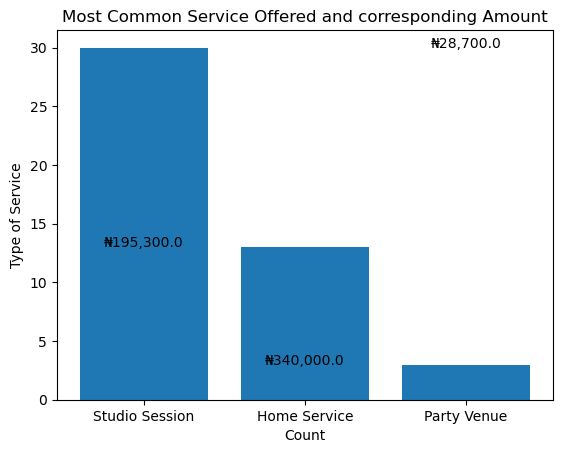

In [15]:
### Visualize the Total Amount for each of the Type of Service

# Group the DataFrame by the "Type of Service" column and count the number of occurrences
service_counts = data.groupby('Type of Service').size().reset_index(name='Count')

# Calculate the total value for each service
service_totals = data.groupby('Type of Service')['Amount Paid (NGN)'].sum().reset_index(name='Total')

# Merge the service counts and totals into a single DataFrame
services = pd.merge(service_counts, service_totals, on='Type of Service')

# Sort the services by the count of occurrences
sorted_services = services.sort_values('Count', ascending=False)

# Create a horizontal bar chart
plt.bar(sorted_services['Type of Service'], sorted_services['Count'])

# Add the total value label to each bar
for i, v in enumerate(sorted_services['Total']):
    plt.text(i, sorted_services['Count'][i], f'₦{v:,}', ha='center')

# Set the chart title and labels
plt.title('Most Common Service Offered and corresponding Amount')
plt.xlabel('Count')
plt.ylabel('Type of Service')

# Show the chart
plt.show()


#### Analyze the Best Sales Month

In [16]:

# Group the data by month and sum the "Amount Paid (NGN)" column
sales_by_month = data.groupby('month')['Amount Paid (NGN)'].sum().reset_index(name='Total Sales')

# Print the sales by month
print(sales_by_month)

      month  Total Sales
0     April     131800.0
1  February      92000.0
2   January     196000.0
3     March     138200.0
4       May       6000.0


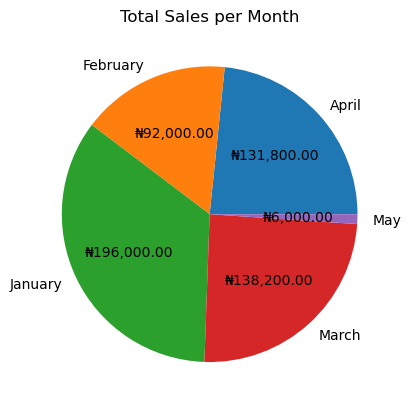

In [17]:
#Visualize the Best Sales Month

# Set the locale to Nigeria
locale.setlocale(locale.LC_ALL, 'en_NG')

# Group the DataFrame by the "Month" column and sum the "Amount Paid (NGN)" column
sales_per_month = data.groupby('month')['Amount Paid (NGN)'].sum()

# Create a pie chart
plt.pie(sales_per_month, labels=sales_per_month.index, autopct=lambda x: locale.currency(x * sales_per_month.sum() / 100, grouping=True))

# Set the chart title
plt.title('Total Sales per Month')

# Show the chart
plt.show()



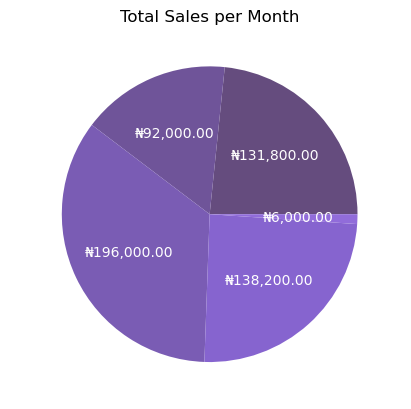

In [18]:


# Set the locale to Nigeria
locale.setlocale(locale.LC_ALL, 'en_NG')

# Group the DataFrame by the "Month" column and sum the "Amount Paid (NGN)" column
sales_per_month = data.groupby('month')['Amount Paid (NGN)'].sum()

# Set the colors to different shades of Pantone Color of the Year 2018 - Ultra Violet
colors = ['#654C7E', '#6F5499', '#7A5CB4', '#8664CF', '#916CDA', '#9D75E5', '#A97DEE', '#B487F7', '#C08FFF']

# Create a pie chart with the specified colors and text color
plt.pie(sales_per_month, labels=sales_per_month.index, autopct=lambda x: locale.currency(x * sales_per_month.sum() / 100, grouping=True), colors=colors, textprops={'color': 'white'})

# Set the chart title
plt.title('Total Sales per Month')

# Show the chart
plt.show()


#### Analyze the highest service description been offered so as to know the type of makeup with highest patronize



In [19]:
makeup_type = data.groupby('DESCRIPTION OF SERVICE')['Amount Paid (NGN)'].sum()
highest_service = makeup_type.idxmax()

print('Total amount paid per description of service:')
print(makeup_type)
print('The highest description of service based on the total amount paid is:', highest_service)


Total amount paid per description of service:
DESCRIPTION OF SERVICE
Birthday Shoot        165000.0
Bridal Makeup          10000.0
Engagement Makeups     60000.0
Gele                    7200.0
Nails                   8300.0
Party Makeup          128500.0
Wedding Makeup        185000.0
Name: Amount Paid (NGN), dtype: float64
The highest description of service based on the total amount paid is: Wedding Makeup


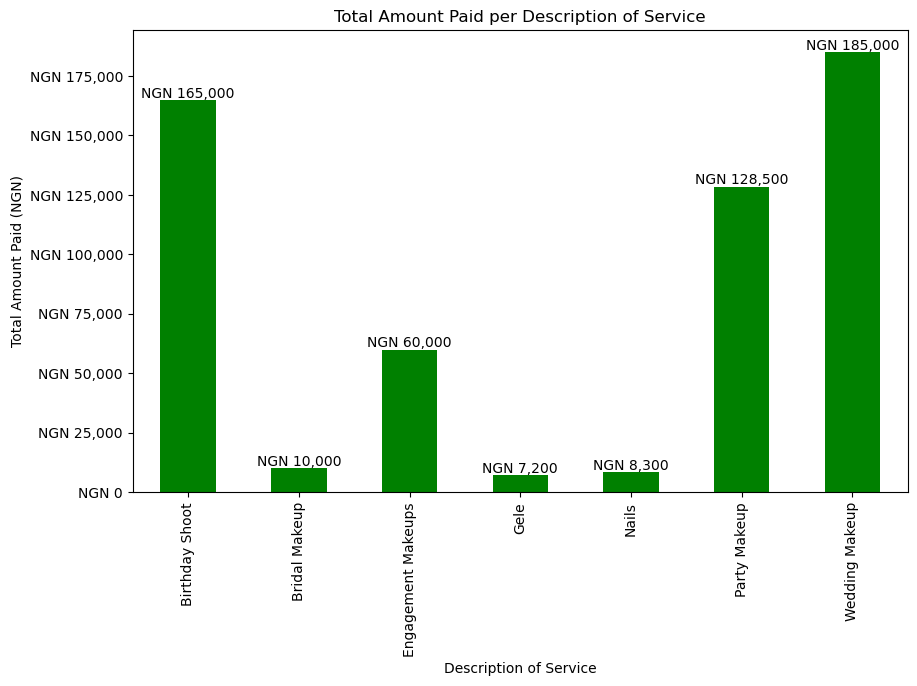

In [20]:
#Visualize the result

# assuming your dataframe is named 'makeup_df'
amount_paid_by_service = data.groupby('DESCRIPTION OF SERVICE')['Amount Paid (NGN)'].sum()

# create a bar chart
ax = amount_paid_by_service.plot(kind='bar', figsize=(10, 6), color='green')

# set the chart title and axis labels
ax.set_title('Total Amount Paid per Description of Service')
ax.set_xlabel('Description of Service')
ax.set_ylabel('Total Amount Paid (NGN)')

# format y-axis as currency
def currency_formatter(x, pos):
    return 'NGN {:,.0f}'.format(x)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(currency_formatter))

# add labels to the bars
for i, v in enumerate(amount_paid_by_service):
    ax.text(i, v+1000, 'NGN {:,.0f}'.format(v), color='black', ha='center')


# display the chart
plt.show()


#### Analyze the client source so as to identify which marketing channels are most effective at driving business

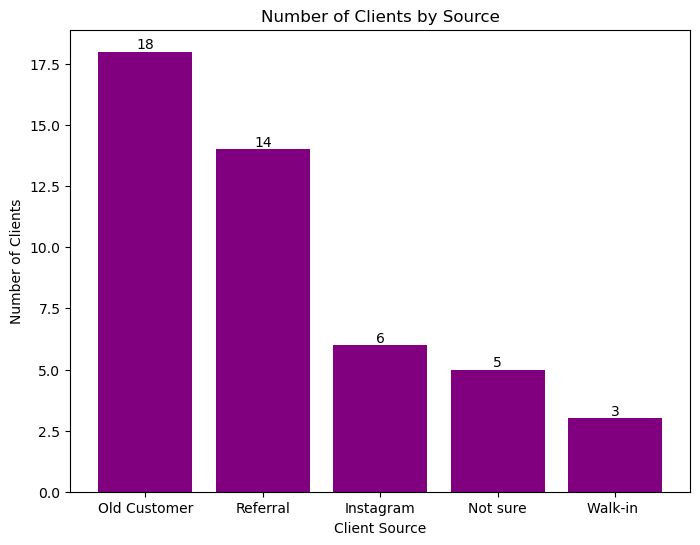

In [21]:
# Extract the client source column
client_source = data['Client Source']

# Group the data by client source and count the occurrences
client_source_count = client_source.groupby(client_source).count()

# Sort the results in descending order
client_source_count = client_source_count.sort_values(ascending=False)

# Visualize the data
plt.figure(figsize=(8,6))
ax = plt.bar(client_source_count.index, client_source_count.values, color = 'purple')
plt.title('Number of Clients by Source')
plt.xlabel('Client Source')
plt.ylabel('Number of Clients')

# Add text labels to the top of each bar
for rect in ax:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.show()


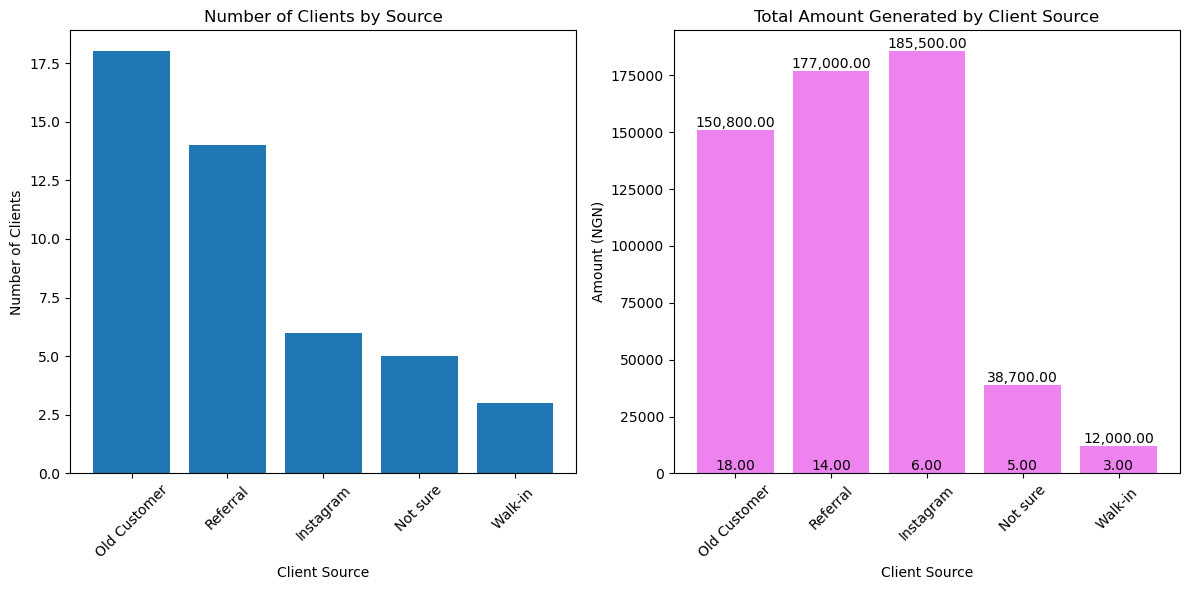

In [22]:
# Extract the client source and amount paid columns
client_source = data['Client Source']
amount_paid = data['Amount Paid (NGN)']

# Group the data by client source and sum the amount paid
client_source_amount = amount_paid.groupby(client_source).sum()

# Group the data by client source and count the occurrences
client_source_count = client_source.groupby(client_source).count()

# Sort the results in descending order
client_source_count = client_source_count.sort_values(ascending=False)
client_source_amount = client_source_amount[client_source_count.index]

# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the number of clients per source on the first subplot
ax[0].bar(client_source_count.index, client_source_count.values)
ax[0].set_title('Number of Clients by Source')
ax[0].set_xlabel('Client Source')
ax[0].set_ylabel('Number of Clients')

# Plot the total amount generated per source on the second subplot
ax[1].bar(client_source_amount.index, client_source_amount.values, color = 'violet')
ax[1].set_title('Total Amount Generated by Client Source')
ax[1].set_xlabel('Client Source')
ax[1].set_ylabel('Amount (NGN)')

# Rotate the x-axis labels
for axi in ax.flat:
    for label in axi.get_xticklabels():
        label.set_rotation(45)

# Add labels to the bars in the first subplot
for i, v in enumerate(client_source_count.values):
    ax[1].text(i, v, f"{v:,.2f}", ha='center', va='bottom')
        
# Add labels to the bars in the second subplot
for i, v in enumerate(client_source_amount.values):
    ax[1].text(i, v, f"{v:,.2f}", ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


In [23]:
# Group the data by client source and sum the amount paid
client_source_amount = data['Amount Paid (NGN)'].groupby(data['Client Source']).sum()

# Group the data by client source and count the occurrences
client_source_count = data['Client Source'].groupby(data['Client Source']).count()

# Calculate the average amount paid per client source
client_source_avg_amount = client_source_amount / client_source_count

# Sort the results by average amount paid in descending order
client_source_avg_amount = client_source_avg_amount.sort_values(ascending=False)

# Print the top 5 marketing channels by average amount paid
print('Top 5 marketing channels by average amount paid:')
print(client_source_avg_amount.head(5))


Top 5 marketing channels by average amount paid:
Client Source
Instagram       30916.666667
Referral        12642.857143
Old Customer     8377.777778
Not sure         7740.000000
Walk-in          4000.000000
dtype: float64


In [24]:

sales_per_month = data.groupby('month')['Amount Paid (NGN)'].sum().reset_index()

# Create bar chart
fig_bar = px.bar(sales_per_month, x='month', y='Amount Paid (NGN)', title='Total Sales per Month')

# Create pie chart
sales_per_service = data.groupby('DESCRIPTION OF SERVICE')['Amount Paid (NGN)'].sum().reset_index()
fig_pie = px.pie(sales_per_service, values='Amount Paid (NGN)', names='DESCRIPTION OF SERVICE', title='Total Sales per Service')

# Set up the layout of the dashboard
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1('Sales Dashboard'),
    html.Div([
        dcc.Graph(figure=fig_bar),
        dcc.Graph(figure=fig_pie),
    ], style={'display': 'flex', 'flex-wrap': 'wrap'})
])

# Run the dashboard
if __name__ == '__main__':
    app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

C:\Users\pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [25]:
data.head()

,DESCRIPTION OF SERVICE,Client Source,Particular,Type of Service,Date (M/D/Y),Amount to be paid (NGN),Amount Paid (NGN),Amount to be Save,Status,Details,month
0,Birthday Shoot,Old Customer,Dammy Obag,Home Service,2023-01-11,"12,000.00",12000.0,"6,000.00",Job Completed (Paid),NaN,January
1,Birthday Shoot,Old Customer,CUST Laderin,Home Service,2023-01-14,"10,000.00",10000.0,"5,000.00",Job Completed (Paid),NaN,January
2,Wedding Makeup,Instagram,Jan 21st bride,Home Service,2023-01-21,"135,000.00",135000.0,"67,500.00",Job Completed (Paid),"3 days job.pre wedding shoot in ikeja, engagem...",January
3,Party Makeup,Instagram,Bridesmaid,Party Venue,2023-01-21,"22,000.00",22000.0,"11,000.00",Job Completed (Paid),NaN,January
4,Party Makeup,Walk-in,NaN,Studio Session,2023-01-27,"2,000.00",2000.0,"1,000.00",Job Completed (Paid),Makeup only no lashes,January
